In [8]:
import pickle
import matplotlib.pyplot as plt

from utils import load_tuning_results
from post_processing import best_PCA, get_training_times, get_rand_scores
from plot import plot_rand_score_vs_PCA, plot_training_time_vs_PCA

Loading the results of the tuning phase.

In [2]:
gaussian_mixture = load_tuning_results("GaussianMixture")
gaussian_mixture.pop(int)
gaussian_mixture

{2: ({'init_params': 'kmeans', 'n_components': 15},
  0.8716667914129215,
  0.8741800665401179,
  3.096677780151367),
 12: ({'init_params': 'kmeans', 'n_components': 15},
  0.8970482541194615,
  0.8914197946645439,
  2.8021011352539062),
 22: ({'init_params': 'kmeans', 'n_components': 15},
  0.8962064210299504,
  0.8922693854224073,
  4.072518825531006),
 32: ({'init_params': 'kmeans', 'n_components': 15},
  0.8896107009605461,
  0.8992180107362276,
  6.653436899185181),
 42: ({'init_params': 'kmeans', 'n_components': 15},
  0.8675602354302046,
  0.8547295327903986,
  8.854449987411499),
 52: ({'init_params': 'kmeans', 'n_components': 15},
  0.8650815953911929,
  0.8927616190067968,
  9.768435001373291),
 62: ({'init_params': 'kmeans', 'n_components': 15},
  0.8648662833554475,
  0.8529342967362684,
  10.573226928710938),
 72: ({'init_params': 'kmeans', 'n_components': 15},
  0.8613514101997074,
  0.8562011715959422,
  12.34500789642334),
 82: ({'init_params': 'kmeans', 'n_components':

Now we search for the PCA dimension corresponding to the best rand score.

Recall: gaussian_mixture is a dictionary in the following form:
- the keys are the values of the PCA dimension;
- the values are tuples containing (Dict['init_params' : value, 'n_components' : value], training_rand_score, validation_rand_score, training time).

In [3]:
best_PCA(gaussian_mixture)

The best PCA dimension is 32, with hyperparameters =  {'init_params': 'kmeans', 'n_components': 15}


In [4]:
rand_scores = get_rand_scores(gaussian_mixture)
rand_scores

[0.8741800665401179,
 0.8914197946645439,
 0.8922693854224073,
 0.8992180107362276,
 0.8547295327903986,
 0.8927616190067968,
 0.8529342967362684,
 0.8562011715959422,
 0.8601393668483253,
 0.8511923744208356,
 0.8336784030371686,
 0.8467385136652175,
 0.8103484171208132,
 0.8456593799114159,
 0.8052803461719021,
 0.8092918171983753,
 0.8061345090114914,
 0.8076060661727186,
 0.830971771477558,
 0.8342060294327761,
 0.8274267344314494]

In [5]:
training_times = get_training_times(gaussian_mixture)
training_times

[3.096677780151367,
 2.8021011352539062,
 4.072518825531006,
 6.653436899185181,
 8.854449987411499,
 9.768435001373291,
 10.573226928710938,
 12.34500789642334,
 12.637606859207153,
 13.105410099029541,
 15.83841609954834,
 15.220613956451416,
 17.409634828567505,
 22.08801293373108,
 24.41451406478882,
 20.954044103622437,
 27.30415916442871,
 25.50641894340515,
 26.730238914489746,
 25.645325183868408,
 27.16891598701477]

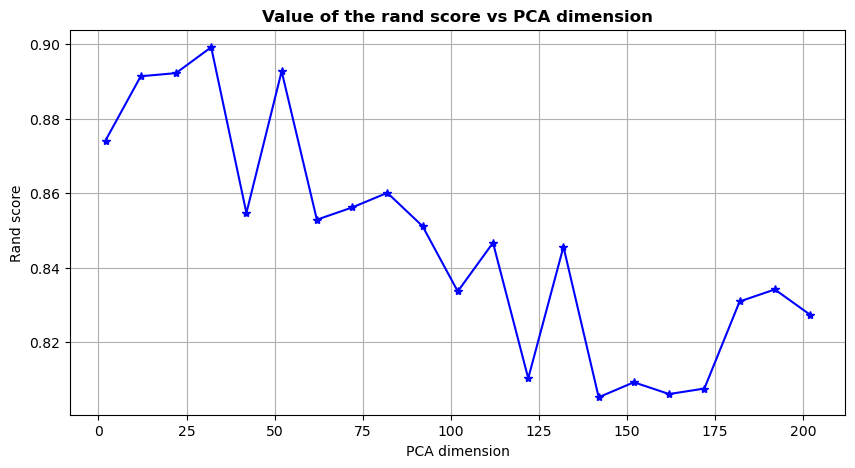

In [6]:
pca_dimensions = range(2,200+10,10)

plot_rand_score_vs_PCA(pca_dimensions, rand_scores)

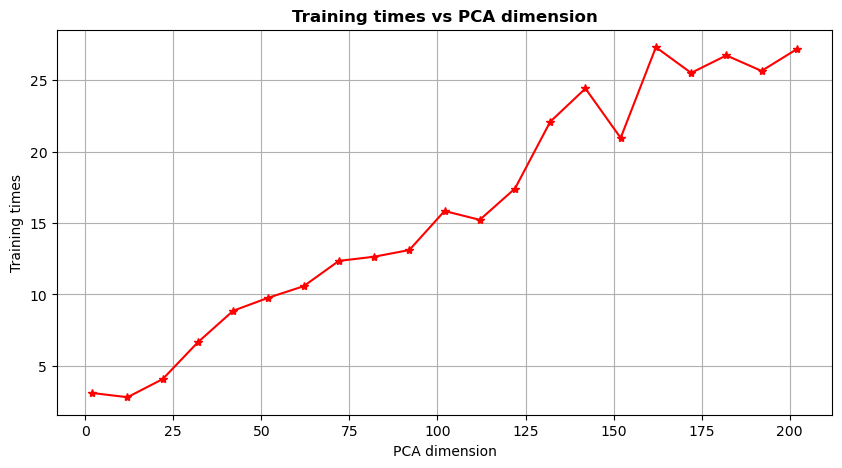

In [9]:
plot_training_time_vs_PCA(pca_dimensions, training_times)